<a href="https://colab.research.google.com/github/FEZEKIL/Classification-Models-with-Keras/blob/main/Classification-Models-with-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Models with Keras

In [1]:
!pip install tensorflow_cpu==2.18.0
!pip install matplotlib==3.9.2

print("==== All required libraries are installed =====")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.2/230.2 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
==== All required libraries are installed =====


Suppress the tensorflow warning messages
We use the following code to suppress the warning messages due to use of CPU architechture for tensoflow.

You may want to comment out these lines if you are using the GPU architechture

In [2]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

Let's visualize the first image in the training set using Matplotlib's scripting layer.

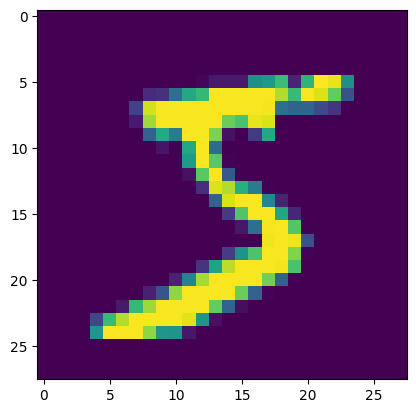

In [7]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [8]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


Build a Neural Network

In [11]:
# define classification model
def classification_model():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train and Test the Network

In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9438 - loss: 0.1838 - val_accuracy: 0.9703 - val_loss: 0.0943
Epoch 2/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9758 - loss: 0.0772 - val_accuracy: 0.9708 - val_loss: 0.1009
Epoch 3/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9830 - loss: 0.0543 - val_accuracy: 0.9714 - val_loss: 0.0923
Epoch 4/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9872 - loss: 0.0401 - val_accuracy: 0.9719 - val_loss: 0.1045
Epoch 5/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9786 - val_loss: 0.0772
Epoch 6/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9784 - val_loss: 0.0751
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9930 - loss: 0.0210 - val_accuracy: 0.9794 - val_loss: 0.0834
Epoch 8/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9794 - val_loss: 0.0908
Epoch 9/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9946 - loss: 0.0170 - val_a

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9772999882698059% 
 Error: 0.022700011730194092


In [14]:
model.save('classification_model.keras')

In [15]:
pretrained_model = keras.saving.load_model('classification_model.keras')

In [16]:
def classification_model_6layers():
    # create model

    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model_6layers = classification_model_6layers()

# fit the model
model_6layers.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_6layers = model_6layers.evaluate(X_test, y_test, verbose=0)

print('Accuracy_3_layers: {}% \n Accuracy_6_layers: {}'.format(scores[1], scores_6layers[1]))


Epoch 1/10
1875/1875 - 24s - 13ms/step - accuracy: 0.9334 - loss: 0.2230 - val_accuracy: 0.9650 - val_loss: 0.1067
Epoch 2/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9711 - loss: 0.0994 - val_accuracy: 0.9678 - val_loss: 0.1059
Epoch 3/10
1875/1875 - 43s - 23ms/step - accuracy: 0.9772 - loss: 0.0760 - val_accuracy: 0.9767 - val_loss: 0.0859
Epoch 4/10
1875/1875 - 40s - 22ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9787 - val_loss: 0.0797
Epoch 5/10
1875/1875 - 23s - 12ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9767 - val_loss: 0.0836
Epoch 6/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9881 - loss: 0.0408 - val_accuracy: 0.9782 - val_loss: 0.0771
Epoch 7/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9901 - loss: 0.0334 - val_accuracy: 0.9815 - val_loss: 0.0746
Epoch 8/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9916 - loss: 0.0296 - val_accuracy: 0.9796 - val_loss: 0.0842
Epoch 9/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9921 - loss: 0.0272 - val_a

In [17]:
#load the saved model
pretrained_model = keras.saving.load_model('classification_model.keras')

print("Pre-trained model loaded successufully")

# Further train the loaded model
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))

Pre-trained model loaded successufully
Epoch 1/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9829 - val_loss: 0.0831
Epoch 2/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9826 - val_loss: 0.0930
Epoch 3/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 0.9796 - val_loss: 0.1037
Epoch 4/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9962 - loss: 0.0134 - val_accuracy: 0.9807 - val_loss: 0.0913
Epoch 5/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9826 - val_loss: 0.1029
Epoch 6/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9965 - loss: 0.0130 - val_accuracy: 0.9812 - val_loss: 0.0975
Epoch 7/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9803 - val_loss: 0.1054
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9772 - val_loss: 0.1263
Epoch 9/10
1875/1875 - 19s - 10ms/step - 